# Decision Trees

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

## Different tree algorithms

ID3 (Iterative Dichotomiser 3) was developed in 1986 by Ross Quinlan. The algorithm creates a multiway tree, finding for each node (i.e. in a greedy manner) the categorical feature that will yield the largest information gain for categorical targets. Trees are grown to their maximum size and then a pruning step is usually applied to improve the ability of the tree to generalise to unseen data.

C4.5 is the successor to ID3 and removed the restriction that features must be categorical by dynamically defining a discrete attribute (based on numerical variables) that partitions the continuous attribute value into a discrete set of intervals. C4.5 converts the trained trees (i.e. the output of the ID3 algorithm) into sets of if-then rules. These accuracy of each rule is then evaluated to determine the order in which they should be applied. Pruning is done by removing a rule’s precondition if the accuracy of the rule improves without it.

C5.0 is Quinlan’s latest version release under a proprietary license. It uses less memory and builds smaller rulesets than C4.5 while being more accurate.

CART (Classification and Regression Trees) is very similar to C4.5, but it differs in that it supports numerical target variables (regression) and does not compute rule sets. CART constructs binary trees using the feature and threshold that yield the largest information gain at each node.

# Splitting the tree

The Gini Index or Gini Impurity is calculated by subtracting the sum of the squared probabilities of each class from one. It favours mostly the larger partitions and are very simple to implement. In simple terms, it calculates the probability of a certain randomly selected feature that was classified incorrectly.

The Gini Index varies between 0 and 1, where 0 represents purity of the classification and 1 denotes random distribution of elements among various classes. A Gini Index of 0.5 shows that there is equal distribution of elements across some classes.

The Gini Index works on categorical variables and gives the results in terms of “success” or “failure” and hence performs only binary split. It isn’t computationally intensive


An alternative to the Gini Index is the Information Entropy which used to determine which attribute gives us the maximum information about a class. It is based on the concept of entropy, which is the degree of impurity or uncertainty. It aims to decrease the level of entropy from the root nodes to the leaf nodes of the decision tree. 

## Advantages

- Simple to understand and to interpret. Trees can be visualised.

- Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.

- The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.

- Able to handle both numerical and categorical data. However scikit-learn implementation does not support categorical variables for now. Other techniques are usually specialised in analysing datasets that have only one type of variable. See algorithms for more information.

- Able to handle multi-output problems.

- Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.

- Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.

- Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

## Problems

- Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.

- Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.

- Predictions of decision trees are neither smooth nor continuous, but piecewise constant approximations as seen in the above figure. Therefore, they are not good at extrapolation.

- The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.

- There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.

- Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

## Practical tips 

- Decision trees tend to overfit on data with a large number of features. Getting the right ratio of samples to number of features is important, since a tree with few samples in high dimensional space is very likely to overfit.

- Consider performing dimensionality reduction (PCA, ICA, or Feature selection) beforehand to give your tree a better chance of finding features that are discriminative.

- Understanding the decision tree structure will help in gaining more insights about how the decision tree makes predictions, which is important for understanding the important features in the data.

- Visualise your tree as you are training by using the export function. Use max_depth=3 as an initial tree depth to get a feel for how the tree is fitting to your data, and then increase the depth.

- Remember that the number of samples required to populate the tree doubles for each additional level the tree grows to. Use max_depth to control the size of the tree to prevent overfitting.

- Balance your dataset before training to prevent the tree from being biased toward the classes that are dominant. Class balancing can be done by sampling an equal number of samples from each class, or preferably by normalizing the sum of the sample weights (sample_weight) for each class to the same value. Also note that weight-based pre-pruning criteria, such as min_weight_fraction_leaf, will then be less biased toward dominant classes than criteria that are not aware of the sample weights, like min_samples_leaf.

- If the samples are weighted, it will be easier to optimize the tree structure using weight-based pre-pruning criterion such as min_weight_fraction_leaf, which ensure that leaf nodes contain at least a fraction of the overall sum of the sample weights.

- If the input matrix X is very sparse, it is recommended to convert to sparse csc_matrix before calling fit and sparse csr_matrix before calling predict. Training time can be orders of magnitude faster for a sparse matrix input compared to a dense matrix when features have zero values in most of the samples.

# Introduction

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import graphviz

# install graphviz on Windows using `winget install graphviz`
# install graphviz on Ubuntu using `sudo apt install graphviz`
# install graphviz on Mac using `brew install graphviz`
# make sure the to set up your PATH to point at the newly installed binaries

# Decision Tree Classifier

In [2]:
x = [[np.random.randn(), np.random.randn()] for i in range(1, 300)]
y = [[(a > 0) & (b > 0) | (a < 0) & (b < 0)] for (a, b) in x]

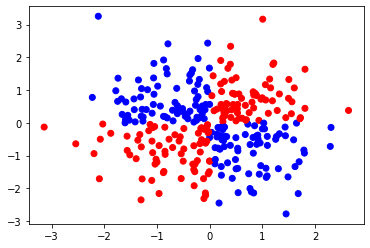

In [3]:
# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()
plt.scatter(list(zip(*x))[0], list(zip(*x))[1], c=y, cmap='bwr')

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

mc = DecisionTreeClassifier(max_depth=1, min_samples_leaf=5) 
mc.fit(x, y)

accuracy_score(y, mc.predict(x))

0.5284280936454849

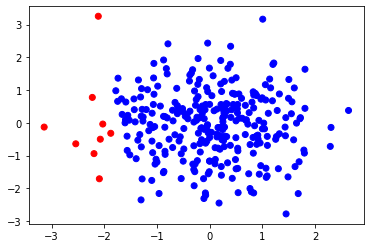

In [5]:
# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()
plt.scatter(list(zip(*x))[0], list(zip(*x))[1], c=mc.predict(x), cmap='bwr')

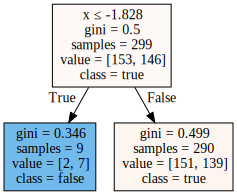

In [6]:
features = ["x", "y"]
target = ["true", "false"]

dat = export_graphviz(mc, filled=True, special_characters=True, feature_names=features, class_names=target)

graph = graphviz.Source(dat)
graph

In [7]:
m2c = DecisionTreeClassifier(max_depth=2, min_samples_leaf=5) 
m2c.fit(x, y)

ŷ = m2c.predict(x)

accuracy_score(y, ŷ)

0.5284280936454849

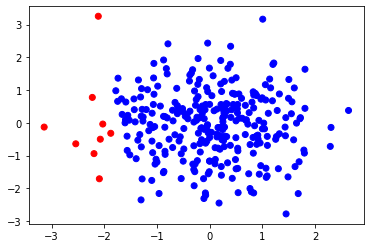

In [8]:
plt.close('all')

# visualize the points
fig, ax = plt.subplots()
plt.scatter(list(zip(*x))[0], list(zip(*x))[1], c=ŷ, cmap='bwr')

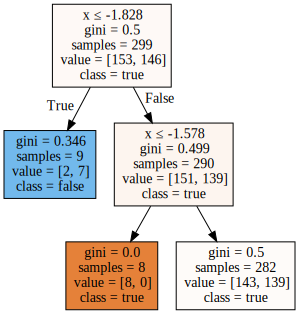

In [9]:
features = ["x", "y"]
target = ["true", "false"]

dat = export_graphviz(m2c, filled=True, special_characters=True, feature_names=features, class_names=target)

graph = graphviz.Source(dat)
graph

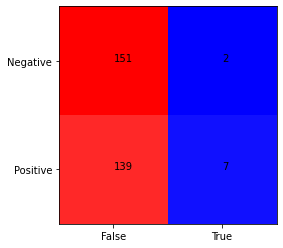

In [10]:
# we can visualize the accuracy of the model using a confusion matrix

acc = confusion_matrix(y, ŷ)

plt.close('all')

fig, ax = plt.subplots()
ax.imshow(acc, cmap='bwr')
ax.xaxis.set(ticks=(0, 1), ticklabels=('False', 'True'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Negative', 'Positive'))
for i in range(2):
    for j in range(2):
        ax.text(j, i, acc[i][j], color='black')
plt.show()

In [11]:
from sklearn.model_selection import GridSearchCV

param = {'criterion':('gini', 'entropy'), 'splitter':('best', 'random'), 'max_depth' : [1,2,3,4,5,10], 'min_samples_leaf' : [1, 2,3,4, 5, 10, 100 ]}
m = DecisionTreeClassifier() 
tree = GridSearchCV(m, param)



In [12]:
tree.fit(x,y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 10, 100],
                         'splitter': ('best', 'random')})

In [13]:
tree.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2)

In [14]:
ŷ = tree.predict(x)

accuracy_score(y, ŷ)

1.0

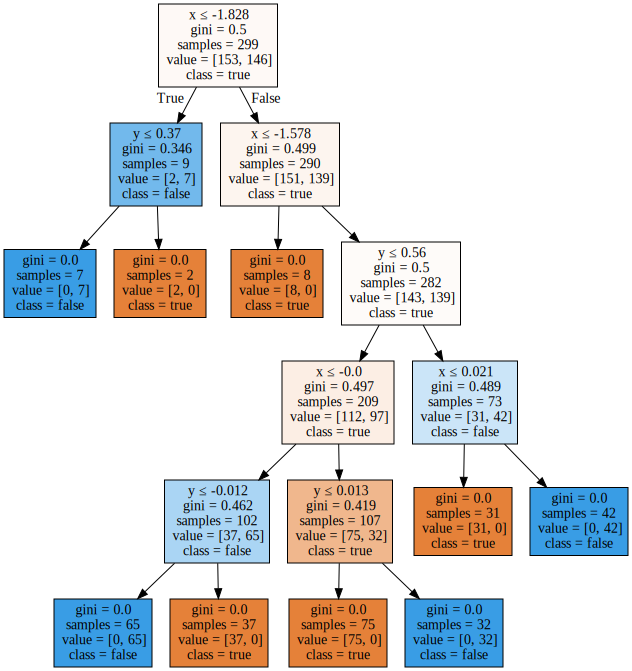

In [42]:
features = ["x", "y"]
target = ["true", "false"]

dat = export_graphviz(tree.best_estimator_, filled=True, special_characters=True, feature_names=features, class_names=target)

graph = graphviz.Source(dat)
graph

## Decision Tree Regressor

In Decision Trees for Classification, we saw how the tree asks right questions at the right node in order to give accurate and efficient classifications. The way this is done in Classification Trees is by using 2 measures , namely Entropy and Information Gain. 

But since we are predicting continuous variables, we cannot calculate the entropy and go through the same process. We need a different measure now. A measure that tells us how much our predictions deviate from the original target and that’s the entry-point of mean square error.

In the Regression Tree algorithm, we do the same thing as the Classification trees. But, we try to reduce the Mean Square Error at each child rather than the entropy.

The basic idea behind the algorithm is to find the point in the independent variable to split the data-set into 2 parts, so that the mean squared error is the minimised at that point. The algorithm does this in a repetitive fashion and forms a tree-like structure.

In [15]:
x = np.linspace(0, 4 * 3.14159, 1000)
y = np.sin(x) + np.random.randn(1000)/5

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

Text(0, 0.5, 'target')

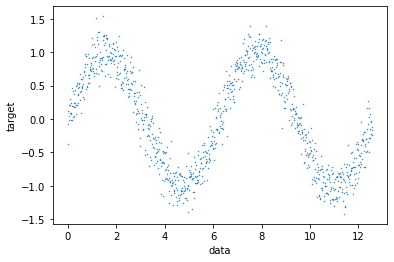

In [16]:
# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()
plt.scatter(x, y, s=0.2)
ax.set_xlabel("data")
ax.set_ylabel("target")

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

m2 = DecisionTreeRegressor(max_depth=2, min_samples_leaf=5) 
m2.fit(x, y)
ŷ = m2.predict(x)

mean_squared_error(y, ŷ)

0.3201248885725335

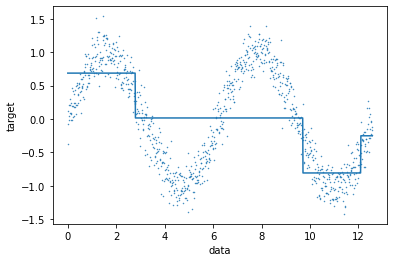

In [18]:
# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()
plt.scatter(x, y, s=0.2)
ax.set_xlabel("data")
ax.set_ylabel("target")
plt.plot(x, ŷ)

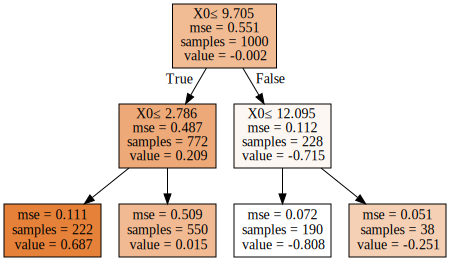

In [19]:
dat = export_graphviz(m2, filled=True, special_characters=True)
graph = graphviz.Source(dat)
graph

In [20]:
m5 = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5) 
m5.fit(x, y)

mean_squared_error(y, m5.predict(x))

0.044606236556876386

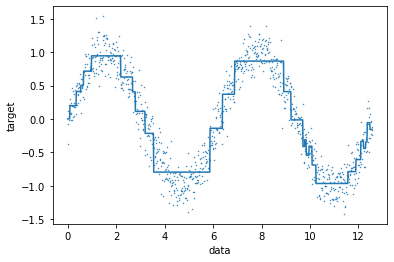

In [21]:
# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()
plt.scatter(x, y, s=0.2)
ax.set_xlabel("data")
ax.set_ylabel("target")
plt.plot(x, m5.predict(x))

# Working with real data

In [22]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [23]:
x, xt, y, yt = train_test_split(pd.DataFrame(housing.data), pd.DataFrame(housing.target), test_size = 0.2)
x

,0,1,2,3,4,5,6,7
3218,1.7596,26.0,5.103448,1.043103,268.0,2.310345,36.32,-119.68
1354,2.7907,29.0,5.097259,1.034483,3266.0,2.887710,38.02,-121.94
20405,6.5851,26.0,7.989950,0.984925,654.0,3.286432,34.21,-118.88
14566,4.5402,34.0,6.441791,1.092537,1046.0,3.122388,32.84,-117.21
18312,5.2114,40.0,5.338485,1.001546,1498.0,2.315301,37.43,-122.13
...,...,...,...,...,...,...,...,...
18993,3.4741,17.0,5.481149,1.068223,1434.0,2.574506,38.41,-122.07
14121,1.6747,20.0,3.989648,1.082816,3555.0,3.680124,32.74,-117.10
3029,2.9952,44.0,5.534296,1.055355,2140.0,2.575211,35.13,-119.47
20152,4.0074,30.0,5.823440,1.051750,1656.0,2.520548,34.46,-119.26


In [24]:
y

,0
3218,1.208
1354,1.139
20405,3.000
14566,1.821
18312,4.384
...,...
18993,2.458
14121,1.000
3029,0.638
20152,4.347


In [25]:
m2r = DecisionTreeRegressor(max_depth=2, min_samples_leaf=5) 
m2r.fit(x, y)

mean_squared_error(y, m2r.predict(x))

0.7367543944310958

In [26]:
m5r = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5) 
m5r.fit(x, y)

mean_squared_error(y, m5r.predict(x))

0.48204573753488944

In [27]:
m20r = DecisionTreeRegressor(max_depth=20, min_samples_leaf=5) 
m20r.fit(x, y)

mean_squared_error(y, m20r.predict(x))

0.11687325553019769

In [28]:
mr200 = DecisionTreeRegressor(max_depth=150, min_samples_leaf=5) 
mr200.fit(x, y)

mean_squared_error(y, mr200.predict(x))

0.11664171017449433

In [29]:
fi = m20r.tree_.compute_feature_importances(normalize=False)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

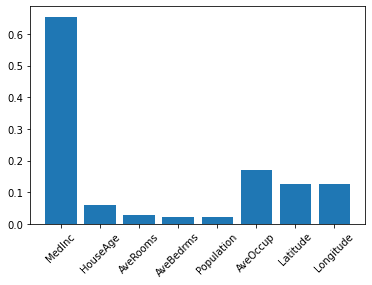

In [30]:
# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()
plt.bar(housing.feature_names, fi)
plt.xticks(rotation=45)

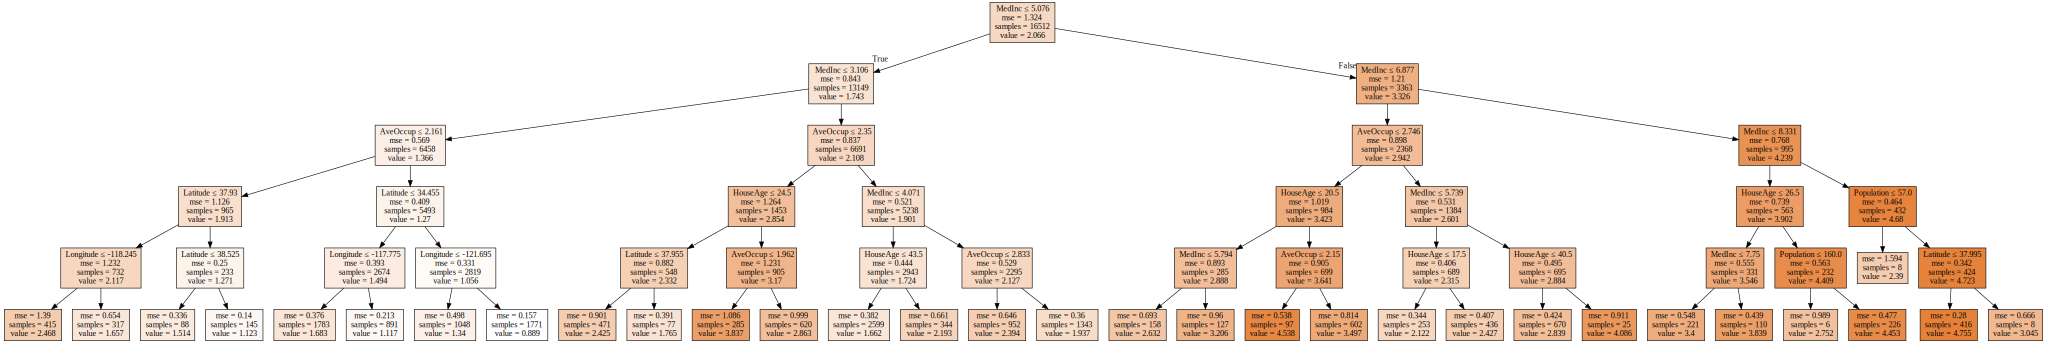

In [31]:
dat = export_graphviz(m5r, filled=True, 
                           special_characters=True,
                           feature_names=housing.feature_names)
graph = graphviz.Source(dat)
graph

# Limitations - Complexity

In [32]:
v = np.linspace(0, 4 * 3.14159, 1000)
xpos = np.sin(v) * v + np.random.randn(1000)
ypos = np.cos(v) * v + np.random.randn(1000)
x1 = [[x, y] for (x, y) in zip(xpos, ypos)]
xpos = -np.sin(v) * v + np.random.randn(1000)
ypos = -np.cos(v) * v + np.random.randn(1000)
x2 = [[x, y] for (x, y) in zip(xpos, ypos)]


x = np.array(x1+x2)
x

y = np.array([True for i in range(1000)] + [False for i in range(1000)])
y = y.reshape(-1, 1)

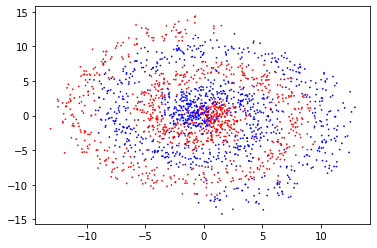

In [33]:
# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()
plt.scatter(list(zip(*x))[0], list(zip(*x))[1], c=y, cmap='bwr', s=0.5)

In [34]:
ms = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5) 
ms.fit(x, y)
ŷ = ms.predict(x)

accuracy_score(y, ŷ)

0.606

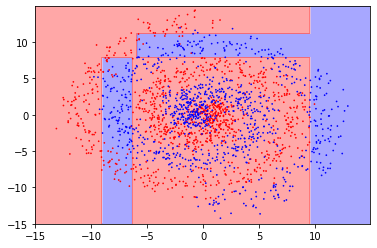

In [35]:
# Plotting decision regions
xx, yy = np.meshgrid(np.arange(-15, 15, 0.1), np.arange(-15, 15, 0.1))
Z = ms.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap='bwr')
plt.scatter(list(zip(*x))[0], list(zip(*x))[1], c=y, cmap='bwr', s=0.5)

In [36]:
ms = DecisionTreeClassifier(max_depth=20, min_samples_leaf=5) 
ms.fit(x, y)
ŷ = ms.predict(x)

accuracy_score(y, ŷ)

0.9025

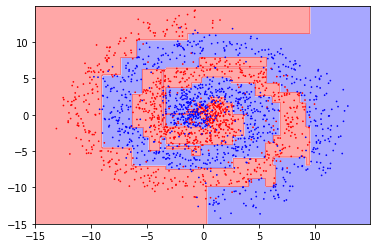

In [37]:
# Plotting decision regions
xx, yy = np.meshgrid(np.arange(-15, 15, 0.1), np.arange(-15, 15, 0.1))
Z = ms.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap='bwr')
plt.scatter(list(zip(*x))[0], list(zip(*x))[1], c=y, cmap='bwr', s=0.5)

# Limitations - Training Samples

In [38]:
x = np.linspace(0, 4 * 3.14159, 1000)
y = np.sin(x) + np.random.randn(1000)/5

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

mts = DecisionTreeRegressor(max_depth=20, min_samples_leaf=5) 
mts.fit(x, y)

mean_squared_error(y, mts.predict(x))

0.026334832437388107

In [39]:
x = np.linspace(0, 8 * 3.14159, 1000)
y = np.sin(x) + np.random.randn(1000)/5

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

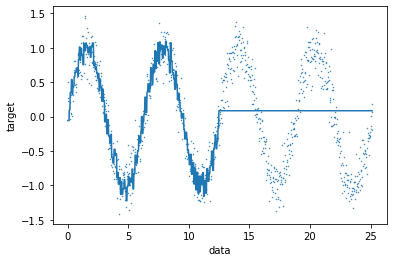

In [40]:
# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()
plt.scatter(x, y, s=0.2)
ax.set_xlabel("data")
ax.set_ylabel("target")
plt.plot(x, mts.predict(x))